In [1]:
import matplotlib.pyplot as plt
from ekpy import control
from ekpy.control.instruments import keysight81150a, keysightdsox3024a
from PUND import PUND
import numpy as np
import time
from datetime import timedelta

2


In [2]:
rm = control.ResourceManager()
rm.list_resources()

('GPIB0::7::INSTR',
 'GPIB0::8::INSTR',
 'USB0::0x0957::0x17A6::MY63080078::0::INSTR')

In [3]:
scope = rm.open_resource('GPIB0::7::INSTR')
wavegen = rm.open_resource('GPIB0::8::INSTR')

In [4]:
keysightdsox3024a.idn(scope)

'AGILENT TECHNOLOGIES,DSO-X 3024A,MY63080078,02.65.2021030741\n'

In [5]:
keysight81150a.idn(wavegen)

'Agilent Technologies,81150A,MY53821602,3.0.0.0-4.6\n'

In [6]:
exp_fe = PUND(wavegen,scope)

# specify run function (if desired)
# options are: run_function aka i havent added a different one


# config data path
Data_folder_path = r"C:\Users\geofr\Desktop\Research\Data\FE\PUND\Python"
exp_fe.config_path(Data_folder_path + '/BTO10')

In [9]:

voltages = [] 
i=0.1 #note will give us 0 data which should be nothing lol
while i < 2.01:
    voltages.append("{}".format(round(i, 2)))
    i +=0.1
voltages = ['0.5', '1', '1.5', '2']
print(voltages)
scan_params = {
    'voltage_max':voltages
}

run_function_args = {
    'wavegen':wavegen,
    'scope':scope,
    'pulse_width':'2e-6',
    'pulse_delay':'2e-4',
    'voltage_max':'2',
    'num_points':'20',
    'step_size':None,
    'capacitor_area':'4e-8',
    'thickness':'10e-9',
    'permittivity':'30',
}

order = ['voltage_max',]

['0.5', '1', '1.5', '2']


Scan 1 of 4. {'voltage_max': '0.5'}
c:\Users\geofr\Desktop\Research\Github\FE\PUND\Python
Scan 2 of 4. {'voltage_max': '1'}
c:\Users\geofr\Desktop\Research\Github\FE\PUND\Python
Scan 3 of 4. {'voltage_max': '1.5'}
c:\Users\geofr\Desktop\Research\Github\FE\PUND\Python
Scan 4 of 4. {'voltage_max': '2'}
c:\Users\geofr\Desktop\Research\Github\FE\PUND\Python
done.


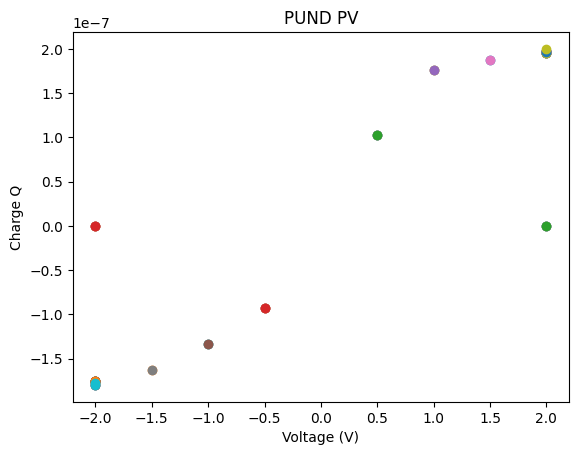

In [10]:
exp_fe.n_param_scan(scan_params, run_function_args, order, ntrials=1, plot=False, use_analysis_file=True)